<h2>Introduction</h2>
<p>
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges. We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is </p>

<h2>Problem Statement</h2>
<p>As a fast growing company, we want to know if our customer are happy or not. We want to be able to predict what makes our customer happy or unhappy. We will be making prediction on customer satisfaction and also see what are most affecting factors. We want to know if he a customer is happy and what factors we should be using to make that decision</p>

In [23]:
# Import the reuqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Read the CSV file into a Pandas Dataframe df
df=pd.read_csv('ACME-HappinessSurvey2020.csv')

In [25]:
df.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


      Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers 
      X1 = my order was delivered on time
      X2 = contents of my order was as I expected
      X3 = I ordered everything I wanted to order
      X4 = I paid a good price for my order
      X5 = I am satisfied with my courier
      X6 = the app makes ordering easy for me

<p>We have a dataset where the target attribute is the Overall Satisfaction of the customer classified as either Happy or Unhappy</p>

Dependent variables are various quenstionarre like 'my order was delivered on time' with each attribute having a rating of 0-5 with 0 being Least and 5 the highest


In [26]:
# Display the name of the Columns
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [27]:
# Display the size of the data set.
df.size

882

In [28]:
# Display the shape of the data set.
df.shape

(126, 7)

In [29]:
# Display the sum of total number of null values for each Column
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

The dataset is relatively smaller with 882 values. No null values are present. Total number of rows 126 and 7 Columns (including Target variable)

In [30]:
df['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

    The dataset is fairly balanced with 57 and 69 values each for the binary target variable

      We will check the responses of the Happy customers, what are the most important parameters for a Happy customer. For e.g. how many Happy Customers rated "My order was delivered on time" as high

In [31]:
# Subset of data of Happy customer only
df_happy=df[df['Y']==1]


[Text(0.5, 1.0, 'My order was delivered on time'),
 Text(0.5, 0, 'X1'),
 Text(0, 0.5, 'No. of Responses')]

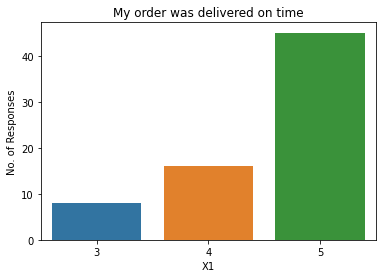

In [32]:
df_x1=df_happy['Y'].groupby(df_happy['X1']).count()
sns.barplot(df_x1.index,df_x1.values).set(title="My order was delivered on time",xlabel='X1',ylabel='No. of Responses')

[Text(0.5, 1.0, 'Contents of my order was as I expected'),
 Text(0.5, 0, 'X2'),
 Text(0, 0.5, 'No. of Responses')]

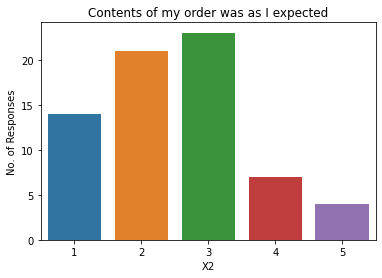

In [33]:
df_x2=df_happy['Y'].groupby(df_happy['X2']).count()

sns.barplot(df_x2.index,df_x2.values).set(title="Contents of my order was as I expected",xlabel='X2',ylabel='No. of Responses')

[Text(0.5, 1.0, 'I ordered everything I wanted to order'),
 Text(0.5, 0, 'X3'),
 Text(0, 0.5, 'No. of Responses')]

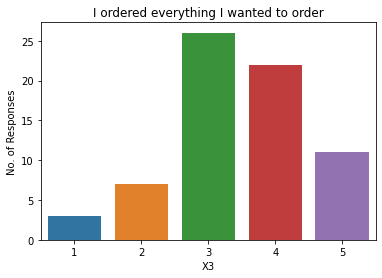

In [34]:
df_x3=df_happy['Y'].groupby(df_happy['X3']).count()
sns.barplot(df_x3.index,df_x3.values).set(title="I ordered everything I wanted to order",xlabel='X3',ylabel='No. of Responses')

[Text(0.5, 1.0, 'I paid a good price for my order'),
 Text(0.5, 0, 'X4'),
 Text(0, 0.5, 'No. of Responses')]

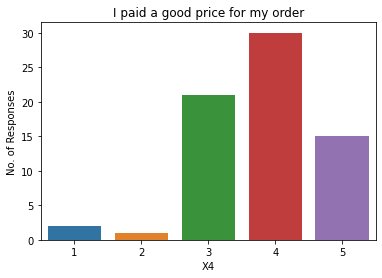

In [35]:
df_x4=df_happy['Y'].groupby(df_happy['X4']).count()
sns.barplot(df_x4.index,df_x4.values).set(title="I paid a good price for my order",xlabel='X4',ylabel='No. of Responses')

[Text(0.5, 1.0, 'I am satisfied with my courier'),
 Text(0.5, 0, 'X5'),
 Text(0, 0.5, 'No. of Responses')]

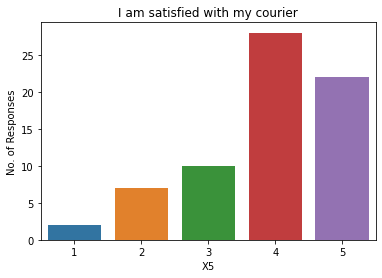

In [36]:
df_x5=df_happy['Y'].groupby(df_happy['X5']).count()
sns.barplot(df_x5.index,df_x5.values).set(title="I am satisfied with my courier",xlabel='X5',ylabel='No. of Responses')

[Text(0.5, 1.0, 'The app makes ordering easy for me'),
 Text(0.5, 0, 'X6'),
 Text(0, 0.5, 'No. of Responses')]

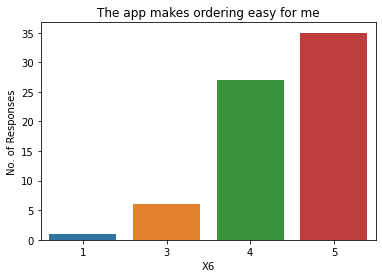

In [37]:
df_x6=df_happy['Y'].groupby(df_happy['X6']).count()
sns.barplot(df_x6.index,df_x6.values).set(title="The app makes ordering easy for me",xlabel='X6',ylabel='No. of Responses')

<h2> Model Training </h2>

<p> Various models were trained and validated in our approach to find the best model to solve our problem. Logistic Regression model with default parameters and then the hyperparameters were tuned, this model didn't give the best accuracy. SVM model was trained with default values, polynomial and hyperparamter tuning. SVM model with polynomial=3 gave better accuracy but it was not the best accuracy. RandomForest model was trained with default and hyperparamter tuning and the accuracy was low. VotingClassifer and AdaBoost models were also trained with accuracy not any better than other models </p>

<p> Feature Engineering was used to select the best features. After dropping less simportant features , the model was trained using Random Forest which resulted in accuracy of 85%. Below table shows all the models used for training and the associated accuracies </p>

<table>
    <tr>
        <th> Model </th>
        <th> Training Accuracy </th>
        <th> Test Accuracy </th>
    </tr>
        <tr>
        <th> SVM </th>
        <th> 0.78 </th>
        <th>0.62 </th>
    </tr>
        <tr>
        <th> SVM(Polynomial) </th>
        <th> 0.8 </th>
        <th> 0.73 </th>
    </tr>
        <tr>
        <th> Logistic Regression </th>
        <th> 0.57 </th>
        <th> 0.62 </th>
    </tr>
        <tr>
        <th> Random Forest </th>
        <th> 0.96 </th>
        <th> 0.61 </th>
    </tr>
        <tr>
        <th> Random Forest(Hyperparameter Tuning) </th>
        <th> 0.57 </th>
        <th> 0.62 </th>
    </tr>
       <tr>
        <th> Random Forest(Feature Engineering) </th>
        <th> 0.82 </th>
        <th> 0.85 </th>
    </tr>
    <tr>
        <th> Voting Classifier </th>
        <th> 0.87 </th>
        <th> 0.69 </th>
    </tr>
     <tr>
        <th> AdaBoost</th>
        <th> 0.96 </th>
        <th> 0.61 </th>
    </tr>
    </table>

In [38]:
# Create datasets for Training the model by separating target feature from the dependent features
X=df.drop(columns=['Y'],axis=1)
Y=df[['Y']]

<AxesSubplot:>

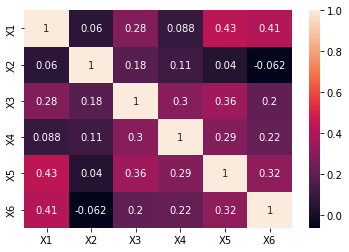

In [39]:
# Plot the Correlation Matrix
sns.heatmap(X.corr(),annot=True)

<p>The Correlation between dependent variables for all dependent variables is less than 0.8 (<0.5) suggesting not strong  correlation</p>

In [40]:
# Split the dataset into Training and Test datasets. We also perform scaling of the data using Standar Scaler. 
# Stratify is used so that train and test is balanced as dataset is small

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


<h3>Feature Engineering</h3>

In [41]:
rfd=RandomForestClassifier(random_state=0)
rfd.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [42]:
# Feature Importances
importances=rfd.feature_importances_
importances

array([0.15659304, 0.17231006, 0.20628881, 0.16959741, 0.17671557,
       0.1184951 ])

In [43]:
for feature,score in zip(X.columns,rfd.feature_importances_):
    print(feature,score*100)

X1 15.65930401469956
X2 17.23100574801835
X3 20.62888133788944
X4 16.959741012621937
X5 17.671557479319727
X6 11.849510407450998


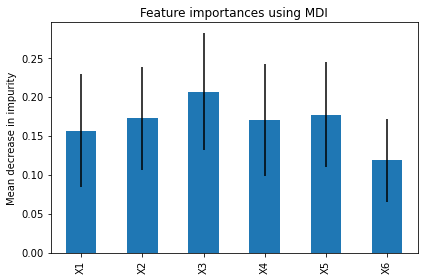

In [44]:
std = np.std([tree.feature_importances_ for tree in rfd.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std,ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [45]:
# Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
selector=SelectFromModel(estimator=LogisticRegression(random_state=42)).fit(X_train,y_train)
print(selector.threshold_)
print(selector.estimator_.coef_)

0.16202512817680417
[[ 0.39476837 -0.1767974   0.0901214  -0.0066312   0.26127217 -0.04256024]]


In [46]:
# Boolean values for features that should be used
selector.get_support()

array([ True,  True, False, False,  True, False])

<h3>Feature engineering</h3>
<p> The least importtant features based on Feature Importances selection will be dropped. Features 'X3' , 'X4' , 'X6' will be dropped </p>

In [47]:
# Create datasets by droping least importtant features
Xf=df.drop(columns=['Y','X3','X4','X6'],axis=1)
Yf=df[['Y']]
Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,Yf,test_size=0.20,stratify=Yf,random_state=42)
scaler = StandardScaler()
Xf_train = scaler.fit_transform(Xf_train)
Xf_test  = scaler.transform(Xf_test)


In [48]:
# Model Training with Random Forest
rff=RandomForestClassifier(random_state=0)
rff.fit(Xf_train,yf_train)


RandomForestClassifier(random_state=0)

In [49]:
print('Accuracy Score of training split',rff.score(Xf_train,yf_train))
print('Accuracy Score of test split',rff.score(Xf_test,yf_test))

Accuracy Score of training split 0.82
Accuracy Score of test split 0.8461538461538461


In [50]:
# Prediction based on the model
y_rffpred=rff.predict(Xf_test)
print('F1 score of Random Forest model',f1_score(yf_test,y_rffpred))
print('Precision Score of Random Forest model',precision_score(yf_test,y_rffpred))
print('Recall Score of Random Forest model',recall_score(yf_test,y_rffpred))
print('Accuracy Score of Random Forest model',accuracy_score(yf_test,y_rffpred))

F1 score of Random Forest model 0.8461538461538461
Precision Score of Random Forest model 0.9166666666666666
Recall Score of Random Forest model 0.7857142857142857
Accuracy Score of Random Forest model 0.8461538461538461


[[11  1]
 [ 3 11]]


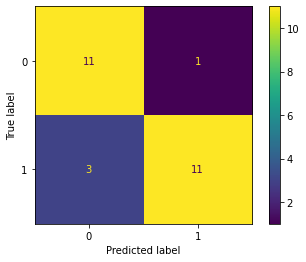

In [51]:
# Calculate the confusion matrix and plot
cm=confusion_matrix(y_test,y_rffpred)
print(cm)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rff.classes_)
disp.plot()

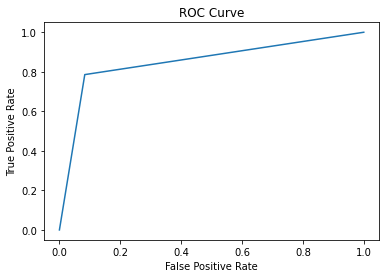

In [52]:
# Plot the ROC curve
rf_auc = roc_auc_score(yf_test,y_rffpred)
fpr,tpr,threshold = roc_curve(yf_test,y_rffpred)
# rf_roc
plt.figure()
plt.plot(fpr,tpr)
plt.title("ROC Curve") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()



* The higher AUC of the ROC curve shows that classification model did a better job at classifying
* Higher value of Precision shows that we are not classifying unhappy customer as Happy which is key for us to get better understanding of Happy customers


<h2> Conclusion </h2>

<p>The model developed provides us with the resource to predict and understand the satification of our customers. This will help us take any required corrective action towards likely unhappy customers to retain business. Upon receiving the survey based on model predictions we can see the breakdown of happy and unhappy customers and take any required actions </p>